# Titanic Dataset EDA and ML 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

## Loading Train and Test files

In [136]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

gender_submission_df = pd.read_csv("./data/gender_submission.csv")

In [125]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [126]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [127]:
gender_submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Data transformation and Data cleaning

In [57]:
train_df = train_df.dropna()
test_df = test_df.dropna()

In [58]:
train_df["Age"] = train_df["Age"].apply(lambda x : np.ceil(x))
train_df["Sex"] = train_df["Sex"].astype("category")
train_df["Embarked"] = train_df["Embarked"].astype("category")

### Adding Survived variable to test dataset

In [137]:
test_df = pd.merge(test_df, gender_submission_df, on="PassengerId", how="right")

Let's assume that some of the variables doesn't have any relevance to predict if a passanger survives or doesn't and drop it

In [138]:
train_df.drop(columns= ["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)
test_df.drop(columns= ["Name", "Ticket", "Cabin", "PassengerId"], inplace=True)

## EDA

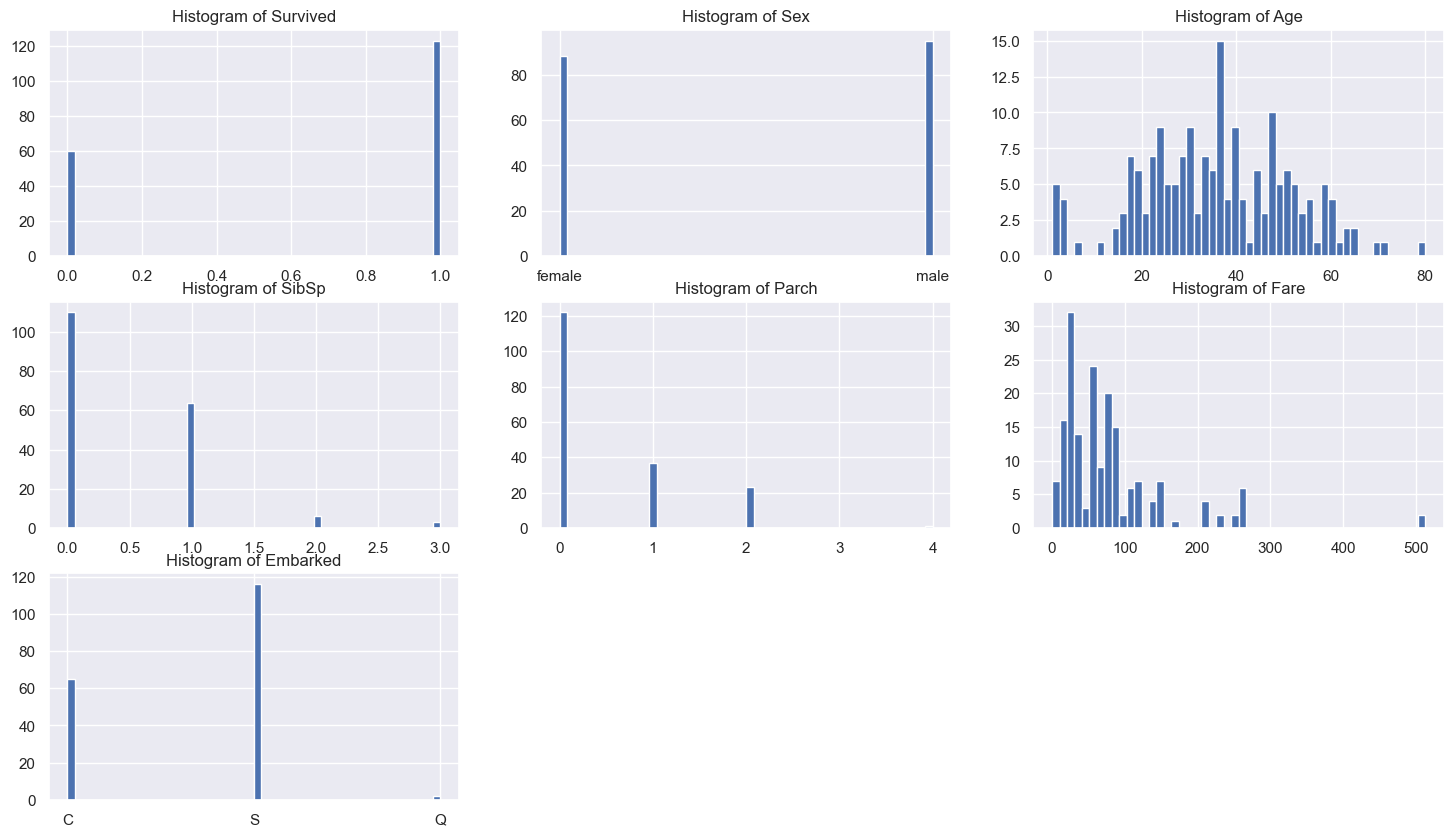

In [38]:
plt.figure(figsize=(18,10))
vars_to_plot = ['Survived', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']
for i, var in enumerate(vars_to_plot):
    plt.subplot(3,3,i+1)
    plt.hist(train_df[var],50)
    title_string = "Histogram of " + var
    plt.title(title_string)

Variables like Sex, SibSp, Parch and Embarked are categorical while Age and Fare are continuous

Let's review the correlation between the objective variable (Survived) and the rest

In [103]:
train_df_dummies = pd.get_dummies(train_df[['Survived', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']]).astype(float)
train_df_dummies.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,1.0,38.0,1.0,0.0,71.2833,1.0,0.0,1.0,0.0,0.0
3,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0,0.0,1.0
6,0.0,54.0,0.0,0.0,51.8625,0.0,1.0,0.0,0.0,1.0
10,1.0,4.0,1.0,1.0,16.7000,1.0,0.0,0.0,0.0,1.0
11,1.0,58.0,0.0,0.0,26.5500,1.0,0.0,0.0,0.0,1.0


In [104]:
corr = train_df_dummies.corr()
pos_cor = corr['Survived'] >0
neg_cor = corr['Survived'] <0

corr['Survived'][pos_cor].sort_values(ascending = False)

Survived      1.000000
Sex_female    0.532418
Fare          0.134241
SibSp         0.106346
Embarked_C    0.104870
Parch         0.023582
Name: Survived, dtype: float64

Based on the correlation analysis can be say that the mos correlated variables to determine if a person survived are if the person is female, it's Fare, it's number of siblings/spouses (SibSp), if were embarked in Cherbourg (C) and it's number of parents/children. 

In [76]:
corr['Survived'][neg_cor].sort_values()

Sex_male     -0.532418
Age          -0.254437
Embarked_S   -0.095861
Embarked_Q   -0.038544
Name: Survived, dtype: float64

And to determine if a person didn't survive are if were male, it's age and if embarked at Queenstown or Southampton

# ML Model


for this scenario a simple logistic regression should work to predict if a person survived or didn't and also, the logistic regression could give some insights about the feature relevance and contrast the correlations shown in the previous step

In [111]:
import statsmodels.api as sm

In [109]:
X = train_df_dummies.drop('Survived', axis=1)
y = train_df_dummies[['Survived']]

In [110]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.444560
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  183
Model:                          Logit   Df Residuals:                      175
Method:                           MLE   Df Model:                            7
Date:                Wed, 10 Jan 2024   Pseudo R-squ.:                  0.2973
Time:                        13:44:19   Log-Likelihood:                -81.354
converged:                       True   LL-Null:                       -115.78
Covariance Type:            nonrobust   LLR p-value:                 2.529e-12
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.0341      0.014     -2.519      0.012      -0.061      -0.008
SibSp          0.2699      0.353      0.764      0.445      -0.422       0.962
Parch         -0.4657      0.320     -1.455      0.146      -1.093       0.162
Fare           0.0024      0.003      0.812      0.417      -0.003       0.008
Sex_female     2.5218   1.15e+07    2.2e-07      1.000   -2.25e+07    2.25e+07
Sex_male      -0.3049   1.15e+07  -2.66e-08      1.000   -2.25e+07    2.25e+07
Embarked_C     1.5481   1.15e+07   1.35e-07      1.000   -2.25e+07    2.25e+07
Embarked_Q    -0.4205   1.15e+07  -3.67e-08      1.000   -2.25e+07    2.25e+07
Embarked_S     1.0893   1.15e+07   9.51e-08      1.000   -2.25e+07    2.25e+07
==============================================================================
"""

Based on the summary from the Logit model trained using the package statsmodels it could be concluded that, based on the P > |z| 
the variables Sex and Embarked are not important to determine if a person survived.
This refutes the hypothesis raised during the analysis of the correlations!

# Evaluation

Let's try some metrics that are common in classification problems and might apply for this scenario
 - Recall
 - F1
 - Specificity 

In [114]:
from sklearn.metrics import f1_score, recall_score, confusion_matrix


def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity_value = tn / (tn + fp)
    return specificity_value

In [139]:
X_test = pd.get_dummies(test_df[['Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']]).astype(float)
X_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0.0,0.0,7.8292,0.0,1.0,0.0,1.0,0.0
1,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,0.0,1.0
2,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,1.0,0.0
3,27.0,0.0,0.0,8.6625,0.0,1.0,0.0,0.0,1.0
4,22.0,1.0,1.0,12.2875,1.0,0.0,0.0,0.0,1.0


In [140]:
y_true = test_df[["Survived"]]
y_true

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [143]:
y_pred = result.predict(X_test)

y_pred = (y_pred > 0.5).astype(int)

In [145]:
# Specificity
specificity_value = specificity(y_true, y_pred)
print(f"Specificity: {specificity_value}")

# F1 Score
f1_score_value = f1_score(y_true, y_pred)
print(f"F1 Score: {f1_score_value}")

# Recall
recall_value = recall_score(y_true, y_pred)
print(f"Recall: {recall_value}")

Specificity: 0.6917293233082706
F1 Score: 0.7036011080332409
Recall: 0.8355263157894737


Based on the scores obtained I concluded that the model is a very well equilibrated model to predict if a person survived or didn't.

The Recall metric gave us a value around 0.84 giving us the idea that in the 84% of the cases the model will be capable of predict if a person survived, from my perspective, I think that the Recall function in this scenario is the most meaninfull because It will allow us to know when someone will survive.



# Challenge questions
* **Your evaluation metrics and the explanation of them: Is this a good model? A bad one? Why?**  
  I chose:   
  - Specificity:
    Specificity measures the ability of the model to correctly identify negative instances. In this case, it suggests that approximately 69.17% of actual negative instances were correctly identified as negative by the model.
  - F1 Score:
    The F1 Score is the harmonic mean of precision and recall. It provides a balanced measure of the model's ability to correctly identify both positive and negative instances. An F1 Score of 0.7036 indicates a reasonable balance between precision and recall.

  - Recall:  
   Recall measures the model's ability to capture all positive instances. A recall of 0.8355 suggests that the model correctly identified about 83.55% of the actual positive instances.  
 The model appears to have strengths in identifying positive instances.  
 
* **What are the most important features for the ML model: All the features are equally important? What are the most useful ones? Why?**
  Based on the statistical analysis of the trained model the most important features were Age, SibSp, Parch and Fare
the conclusion were based on the z and the P > |z| values obtained during the training problem that gave us the statistical significance of the used features of the model.


* **An explanation of how we can put on production the model (please mention the technologies that you'd use and MLOps best practices): What system architecture you'd use? How we can automate stuff? Which cloud services you'd use? Why?**

First, I would define how the model will be serve, if as a package or an api or in other way. 
Once that step is clear will be more easy to develop a production ready solution to handle the model.

Assuming that the model needs to be served in a API what would do is:
 - Create an API using a python tool like FastAPI or Flask
 - Then contenarize the solution using Docker 
 - Then deploy it using some cloud provider using services like containers registries or container deploying services.
  
To automate the process I probably go by creating some automated pipeline using a tool like Apache Airflow by creating a traning DAG.